In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv")

C:\Users\Koke\AppData\Local\Temp\ipykernel_37352\3535135425.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [4]:
train.drop(columns = 'id', inplace = True)
test.drop(columns = 'id', inplace = True)

In [5]:
from Paquetes.visualization import Eda
train_eda = Eda(train)

In [6]:
train_eda.infocat

__________________________________________________________________
Categorias para la columna == Drug:  ['Placebo', 'D-penicillamine']
Frecuencia de las categorias : 
 Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64
Numero de categorias en la columna == Drug ---  2
Numero de valores nulos en la columna == Drug ---  0
Informacion generica == Drug : 
  count        7905
unique          2
top       Placebo
freq         4010
Name: Drug, dtype: object
__________________________________________________________________
__________________________________________________________________
Categorias para la columna == Sex:  ['F', 'M']
Frecuencia de las categorias : 
 Sex
F    7336
M     569
Name: count, dtype: int64
Numero de categorias en la columna == Sex ---  2
Numero de valores nulos en la columna == Sex ---  0
Informacion generica == Sex : 
  count     7905
unique       2
top          F
freq      7336
Name: Sex, dtype: object
___________________________________

__________________________________________________________________
Numero de valores diferentes en la columna == N_Days ---  461
Tamaño de la columna == N_Days ---  7905
% de valores unicos frente al numero de muestras de la columna == N_Days ---  5.832 %
Media de la columna == N_Days ---  2030.1733
------------------------------------------------------------------
Maximo valor de la columna == N_Days ---  4795
Informacion del maximo valor en la columna : N_Days:
 N_Days            4795.00
Age              19025.00
Bilirubin            1.00
Cholesterol        331.00
Albumin              3.70
Copper              54.00
Alk_Phos           466.00
SGOT                99.33
Tryglicerides      133.00
Platelets          243.00
Prothrombin         10.60
Stage                3.00
Name: 565, dtype: float64
------------------------------------------------------------------
Numero de valores nulos en la columna == N_Days ---   0
Numero de valores '0' en la columna == N_Days ---   0
Porcentaje de va

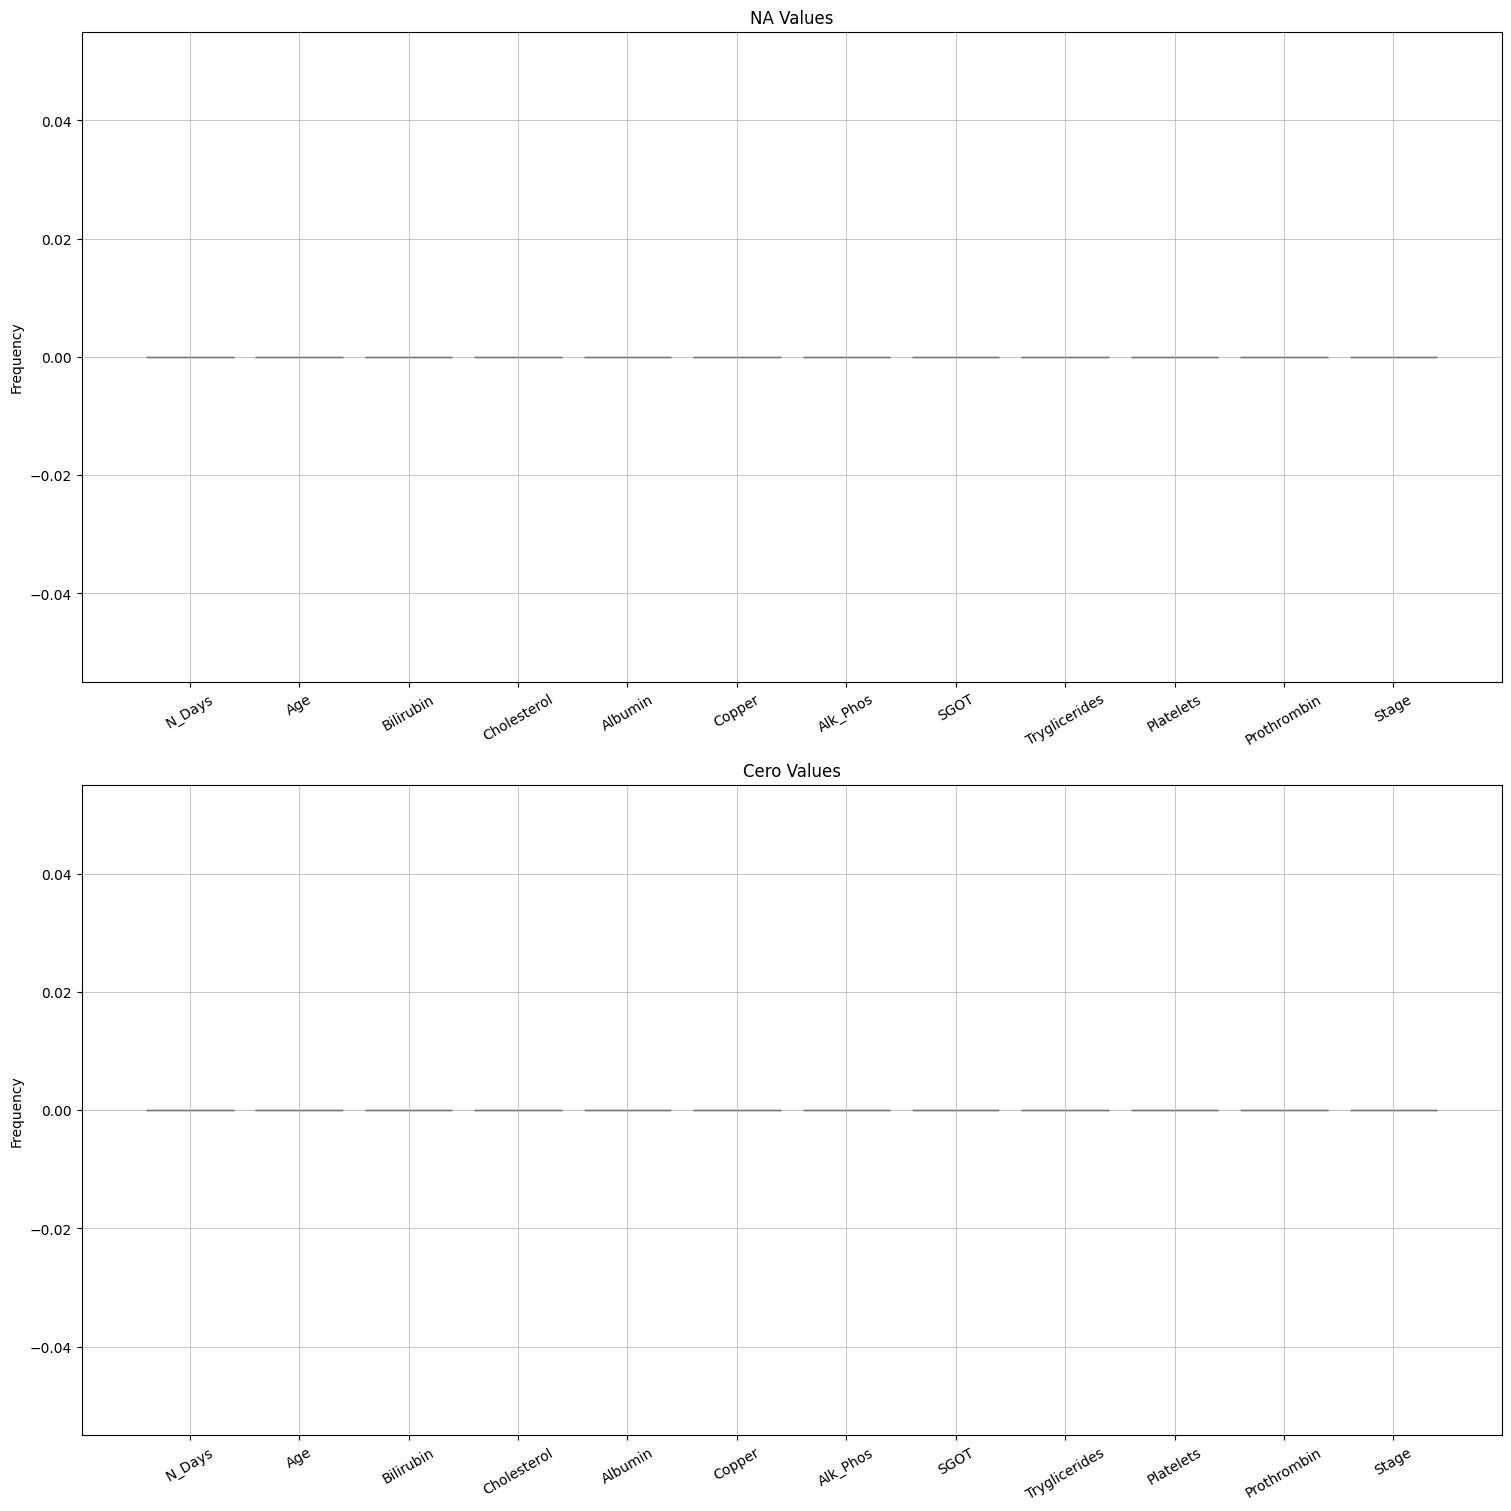

In [7]:
fture_num_df_info = train_eda.infonum

In [8]:
fture_num_df_info.head(12)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
COUNT,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
MIN,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
MAX,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000
MEAN,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
STD,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
NA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NA %,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


EDA CONTINUAR ...

Tratamiento del desbalanceo de clases:

In [9]:
# Proporciones de las status clases dentro de la status feature para estudiar analiticamente el posible desbalanceo de clases 
print(f"Clases : {train_eda.data['Status'].unique()}")
for _ ,unique in enumerate(train_eda.data["Status"].unique()):
    print(f'Proporción de la clase {unique} : {round(100 *train_eda.data["Status"][train_eda.data["Status"]== unique].shape[0]/train_eda.data["Status"].shape[0],3)} %')


Clases : ['D' 'C' 'CL']
Proporción de la clase D : 33.713 %
Proporción de la clase C : 62.808 %
Proporción de la clase CL : 3.479 %


MUY DESBALANCEADO EN LA CLASE CL

In [10]:
# check version number
import imblearn
print(imblearn.__version__)

0.12.0


In [11]:
# Codification of categorical features
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


x_cat = train_eda.cat_data.drop(columns = "Status").values
x_num = train_eda.num_data.values
y = train_eda.data["Status"].values

for c in train_eda.cat_cols:
    print(train_eda.cat_data[c].unique())

print((train_eda.num_cols))
    
    
print(x_cat.shape)
print(x_num.shape)
print(y.shape)

one_hot = OneHotEncoder()
one_hot.fit(x_cat)
cat_col_encoded = one_hot.transform(x_cat).toarray()
print(one_hot.categories_)

print(cat_col_encoded.shape)

X_encoded = np.hstack((cat_col_encoded, x_num))
print(X_encoded.shape)


lab_encoder = LabelEncoder()
y_encoded = lab_encoder.fit_transform(y)

print(X_encoded.shape, y_encoded.shape)


# Aseguramos proporciones de las clases de nuevo
print("new classes : ", np.unique(y_encoded))
print(f"Frecuencia de clases: {np.bincount(y_encoded)}")
for idx, v in enumerate(np.bincount(y_encoded)):
    print(f'Proporción de la clase {idx} : {100*v/y_encoded.shape[0] : .3f}','%')



['D-penicillamine' 'Placebo']
['M' 'F']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y' 'S']
['D' 'C' 'CL']
['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
(7905, 6)
(7905, 12)
(7905,)
[array(['D-penicillamine', 'Placebo'], dtype=object), array(['F', 'M'], dtype=object), array(['N', 'Y'], dtype=object), array(['N', 'Y'], dtype=object), array(['N', 'Y'], dtype=object), array(['N', 'S', 'Y'], dtype=object)]
(7905, 13)
(7905, 25)
(7905, 25) (7905,)
new classes :  [0 1 2]
Frecuencia de clases: [4965  275 2665]
Proporción de la clase 0 :  62.808 %
Proporción de la clase 1 :  3.479 %
Proporción de la clase 2 :  33.713 %


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y_encoded,test_size=0.2, random_state=42, shuffle=True, stratify = y_encoded )

In [13]:
# Synthetic resample using SMOTE of TRAIN set ONLY
from imblearn.over_sampling import SMOTE

new_class_proportions = {
                            0: np.bincount(y_train)[0],
                            1:int(0.15*np.bincount(y_train)[0]),
                            2: np.bincount(y_train)[2]
                        }

sm = SMOTE(sampling_strategy = new_class_proportions, random_state=42)
X_smoted, y_smoted = sm.fit_resample(X_train, y_train)

print(X_smoted.shape, y_smoted.shape)
print(f"Porcentaje de aumento del dataset comparado con el original : {100*(X_smoted.shape[0]-X_train.shape[0])/X_train.shape[0]:.2f} %")

# Nuevas proporciones de las clases a predecir
for idx, v in enumerate(np.bincount(y_smoted)):
    print(f'Proporción de la clase {idx} : {100*v/y_smoted.shape[0] : .3f}','%')

(6699, 25) (6699,)
Porcentaje de aumento del dataset comparado con el original : 5.93 %
Proporción de la clase 0 :  59.292 %
Proporción de la clase 1 :  8.882 %
Proporción de la clase 2 :  31.826 %


In [14]:
X_smoted = X_train
y_smoted = y_train

In [15]:
print(X_smoted.shape,y_smoted.shape,X_test.shape,y_test.shape)

(6324, 25) (6324,) (1581, 25) (1581,)


In [16]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score
from sklearn.pipeline import Pipeline


tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)
ada = AdaBoostClassifier(estimator=tree, n_estimators=50, learning_rate=0.1, random_state=1)
log_reg  = LogisticRegression(penalty = None,random_state=1,multi_class ='ovr',n_jobs = -1)
rdf_tree = RandomForestClassifier(   
                                    n_estimators=100,
                                    criterion='entropy', 
                                    max_depth=6, 
                                    min_samples_split=3,
                                    bootstrap=True, 
                                    oob_score=False, 
                                    n_jobs=-1, 
                                    random_state=42, 
        
                                  )

pipe = Pipeline(
                    steps=[
                                ("estimator",ada)
                            ]
                    )
pipe2 = Pipeline(
                    steps=[
                                ("estimator",log_reg)
                            ]
                    )

def fit_and_predict(estimator, X_train,y_train,X_test, y_test) -> None:
    """_summary_

    Args:
        estimator (_type_): _description_
        X_train (_type_): _description_
        y_train (_type_): _description_
        X_test (_type_): _description_
        y_test (_type_): _description_
    """
    estimator.fit(X_train, y_train)
    print(f"For {str(estimator.__class__).split('.')[-1][0:len(str(estimator.__class__).split('.')[-1])-2]} : ")
    for idx,t in enumerate([(estimator.predict(X_train),y_train),(estimator.predict(X_test),y_test)]):
        y_true = t[1]
        y_pred = t[0]
        d = {0:"Train",1:"Test"}
        
        print(f"{d.get(idx)} set micro precision - {precision_score(y_true, y_pred,average ='micro'):.3f} %")
        print(f"{d.get(idx)} set macro precision - {precision_score(y_true, y_pred, average ='macro'):.3f} %")
        print(f"{d.get(idx)} set micro recall - {recall_score(y_true, y_pred,average ='micro'):.3f} %")
        print(f"{d.get(idx)} set macro recall - {recall_score(y_true, y_pred,average ='macro'):.3f} %")
        print(f"{d.get(idx)} set micro f1 score - {f1_score(y_true, y_pred, average ='micro'):.3f} %")
        print(f"{d.get(idx)} set macro f1 score - {f1_score(y_true, y_pred, average ='macro'):.3f} %")
        print(f"{d.get(idx)} set accuracy - {accuracy_score(y_true, y_pred):.3f} %")
    print(f"-------------------------------------------------------------------- ")
    


estimators = [tree, ada, log_reg, rdf_tree]
for estimator in estimators:
    fit_and_predict(estimator, X_smoted,y_smoted,X_test, y_test)


For DecisionTreeClassifier : 
Train set micro precision - 0.822 %
Train set macro precision - 0.746 %
Train set micro recall - 0.822 %
Train set macro recall - 0.571 %
Train set micro f1 score - 0.822 %
Train set macro f1 score - 0.596 %
Train set accuracy - 0.822 %
Test set micro precision - 0.796 %
Test set macro precision - 0.692 %
Test set micro recall - 0.796 %
Test set macro recall - 0.529 %
Test set micro f1 score - 0.796 %
Test set macro f1 score - 0.533 %
Test set accuracy - 0.796 %
-------------------------------------------------------------------- 


c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoostClassifier : 
Train set micro precision - 0.907 %
Train set macro precision - 0.943 %
Train set micro recall - 0.907 %
Train set macro recall - 0.914 %
Train set micro f1 score - 0.907 %
Train set macro f1 score - 0.925 %
Train set accuracy - 0.907 %
Test set micro precision - 0.799 %
Test set macro precision - 0.750 %
Test set micro recall - 0.799 %
Test set macro recall - 0.550 %
Test set micro f1 score - 0.799 %
Test set macro f1 score - 0.568 %
Test set accuracy - 0.799 %
-------------------------------------------------------------------- 
For LogisticRegression : 
Train set micro precision - 0.763 %
Train set macro precision - 0.500 %
Train set micro recall - 0.763 %
Train set macro recall - 0.495 %
Train set micro f1 score - 0.763 %
Train set macro f1 score - 0.493 %
Train set accuracy - 0.763 %
Test set micro precision - 0.756 %
Test set macro precision - 0.493 %
Test set micro recall - 0.756 %
Test set macro recall - 0.493 %
Test set micro f1 score - 0.756 %
Test s

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For RandomForestClassifier : 
Train set micro precision - 0.829 %
Train set macro precision - 0.550 %
Train set micro recall - 0.829 %
Train set macro recall - 0.551 %
Train set micro f1 score - 0.829 %
Train set macro f1 score - 0.549 %
Train set accuracy - 0.829 %
Test set micro precision - 0.813 %
Test set macro precision - 0.534 %
Test set micro recall - 0.813 %
Test set macro recall - 0.542 %
Test set micro f1 score - 0.813 %
Test set macro f1 score - 0.537 %
Test set accuracy - 0.813 %
-------------------------------------------------------------------- 


c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from Paquetes.cross_validate import cv_function

pipelines = [tree, ada, log_reg, rdf_tree]
metrics = [
                'accuracy', 
                'precision_micro',
                'precision_macro',
                'recall_micro',
                'recall_macro',
                'f1_micro',
                'f1_macro',
                'jaccard_micro',
                'jaccard_macro',
                'roc_auc_ovr',
                'roc_auc_ovo',
                'roc_auc_ovr_weighted',
                'roc_auc_ovo_weighted'
            ]
cv_str = ['k-folds', 'Stratified K-folds','GroupKFold','RepeatedStratifiedKFold']

scores = cv_function(
                        X_train = X_smoted, 
                        y_train = y_smoted, 
                        n_splits=5,
                        pipelines = pipelines, 
                        metrics = metrics,
                        cv_strategies = cv_str,
                        random_state =  0,
                        shuffle = True,
                        group_by = X_smoted[:,2]
                    )

error : group_by is bad defined for GroupKFold strategy
error : group_by is bad defined for GroupKFold strategy
error : group_by is bad defined for GroupKFold strategy
error : group_by is bad defined for GroupKFold strategy


In [18]:
scores.keys()
    

dict_keys(['Pipeline : 0', 'Pipeline : 1', 'Pipeline : 2', 'Pipeline : 3'])

In [19]:
scores[f"{list(scores.keys())[0]}"].head(30)

,k-folds,Stratified K-folds,GroupKFold,RepeatedStratifiedKFold
DecisionTreeClassifier,NaN,NaN,NaN,NaN
Val accuracy,0.795383,0.789219,0.789219,0.793802
Val precision_micro,0.795383,0.789219,0.789219,0.793802
Val precision_macro,0.613632,0.570587,0.570587,0.608914
Val recall_micro,0.795383,0.789219,0.789219,0.793802
Val recall_macro,0.533378,0.532967,0.532967,0.533809
Val f1_micro,0.795383,0.789219,0.789219,0.793802
Val f1_macro,0.54039,0.539641,0.539641,0.541589
Val jaccard_micro,0.660317,0.652117,0.652117,0.658248
Val jaccard_macro,0.442496,0.439989,0.439989,0.442439


In [20]:
scores[f"{list(scores.keys())[1]}"].head(30)

,k-folds,Stratified K-folds,GroupKFold,RepeatedStratifiedKFold
AdaBoostClassifier,NaN,NaN,NaN,NaN
Val accuracy,0.80408,0.802026,0.802026,0.803579
Val precision_micro,0.80408,0.802026,0.802026,0.803579
Val precision_macro,0.780487,0.702157,0.702157,0.729242
Val recall_micro,0.80408,0.802026,0.802026,0.803579
Val recall_macro,0.560223,0.552131,0.552131,0.555247
Val f1_micro,0.80408,0.802026,0.802026,0.803579
Val f1_macro,0.581992,0.567413,0.567413,0.573806
Val jaccard_micro,0.672398,0.669634,0.669634,0.671747
Val jaccard_macro,0.470202,0.461791,0.461791,0.465671


In [21]:
scores[f"{list(scores.keys())[2]}"].head(30)

,k-folds,Stratified K-folds,GroupKFold,RepeatedStratifiedKFold
LogisticRegression,NaN,NaN,NaN,NaN
Val accuracy,0.766288,0.764392,0.764392,0.763389
Val precision_micro,0.766288,0.764392,0.764392,0.763389
Val precision_macro,0.502411,0.500797,0.500797,0.500218
Val recall_micro,0.766288,0.764392,0.764392,0.763389
Val recall_macro,0.497861,0.496419,0.496419,0.495411
Val f1_micro,0.766288,0.764392,0.764392,0.763389
Val f1_macro,0.496246,0.494752,0.494752,0.493819
Val jaccard_micro,0.621294,0.6188,0.6188,0.617411
Val jaccard_macro,0.401372,0.399563,0.399563,0.398373


In [22]:
scores[f"{list(scores.keys())[3]}"].head(30)

,k-folds,Stratified K-folds,GroupKFold,RepeatedStratifiedKFold
RandomForestClassifier,NaN,NaN,NaN,NaN
Val accuracy,0.815626,0.814834,0.814834,0.816072
Val precision_micro,0.815626,0.814834,0.814834,0.816072
Val precision_macro,0.539284,0.538268,0.538268,0.539044
Val recall_micro,0.815626,0.814834,0.814834,0.816072
Val recall_macro,0.540059,0.539779,0.539779,0.54092
Val f1_micro,0.815626,0.814834,0.814834,0.816072
Val f1_macro,0.537521,0.536992,0.536992,0.538043
Val jaccard_micro,0.688806,0.687744,0.687744,0.689377
Val jaccard_macro,0.45392,0.453323,0.453323,0.454584


c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exexcution time of clasification_metrics 1.3102786540985107


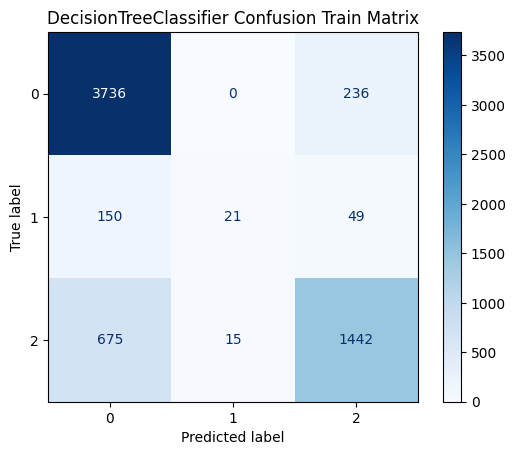

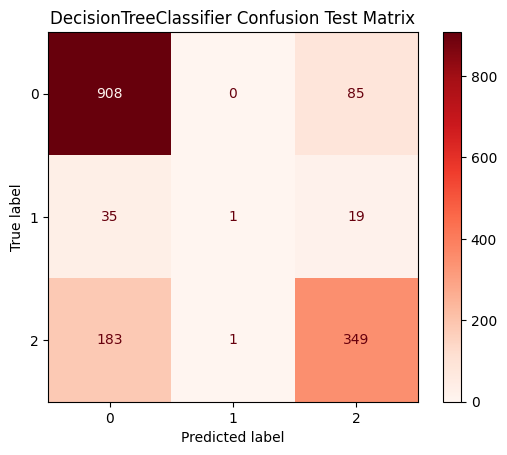

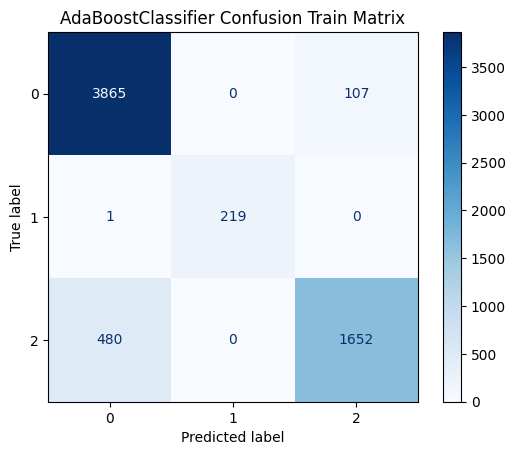

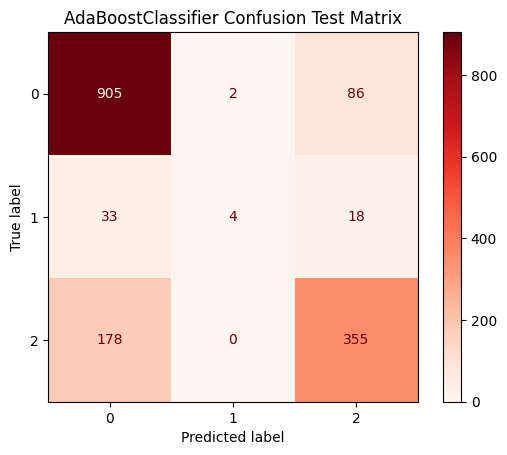

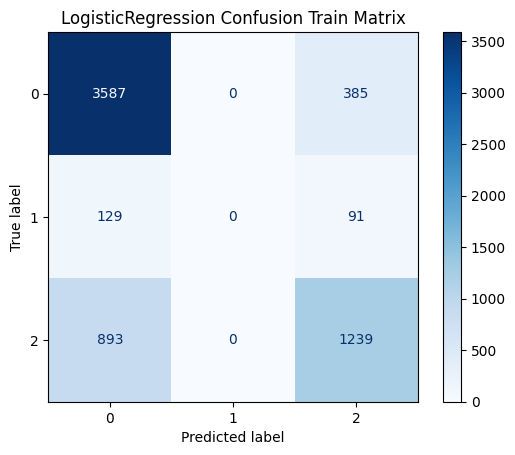

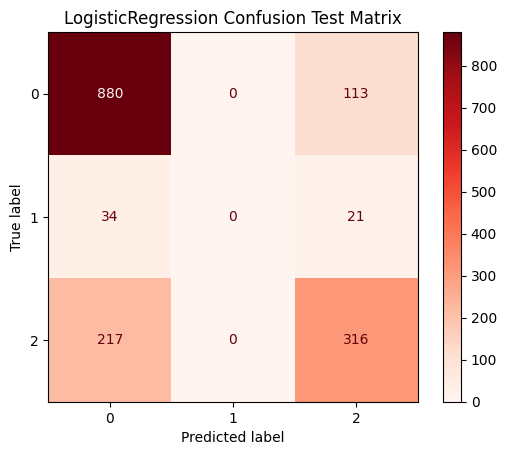

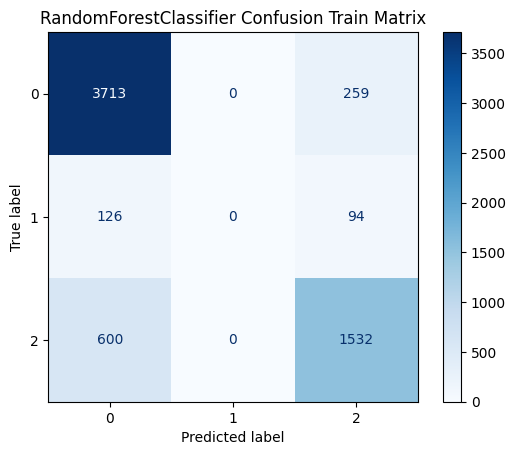

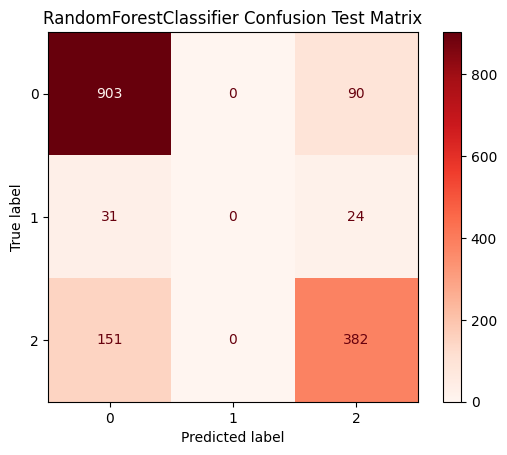

In [23]:
from Paquetes.metrics import  clasification_metrics

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
piplines_fitted = [pipe.fit(X_smoted, y_smoted) for pipe in pipelines]

metrics_list = clasification_metrics(
                                        y_train = y_smoted,
                                        x_train= X_smoted,
                                        y_test  = y_test,
                                        x_test = X_test,
                                        clasifier = piplines_fitted,
                                        average = 'micro',
                                        metrics = [
                                                        "Recall" ,
                                                        "Precision",
                                                        "F1Score",
                                                        "Especificidad" ,
                                                        "JaccardIndex" 
                                                    ],
                                        plot_roc_curve = True,
                                        plot_confusion_matrix = True,

                                        )


In [24]:
# Micro 
for metric in metrics_list:
    print(metric.head())

                          Recall Precision   F1Score JaccardIndex
DecisionTreeClassifier       NaN       NaN       NaN          NaN
Train                   0.822106  0.822106  0.822106     0.697946
Test                    0.795699  0.795699  0.795699     0.660714
                      Recall Precision   F1Score JaccardIndex
AdaBoostClassifier       NaN       NaN       NaN          NaN
Train               0.907021  0.907021  0.907021     0.829861
Test                0.799494  0.799494  0.799494     0.665964
                      Recall Precision   F1Score JaccardIndex
LogisticRegression       NaN       NaN       NaN          NaN
Train               0.763125  0.763125  0.763125     0.616978
Test                0.756483  0.756483  0.756483     0.608342
                          Recall Precision   F1Score JaccardIndex
RandomForestClassifier       NaN       NaN       NaN          NaN
Train                    0.82938   0.82938   0.82938     0.708497
Test                    0.812777  0.812777

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Koke\Des

Exexcution time of clasification_metrics 1.1557273864746094


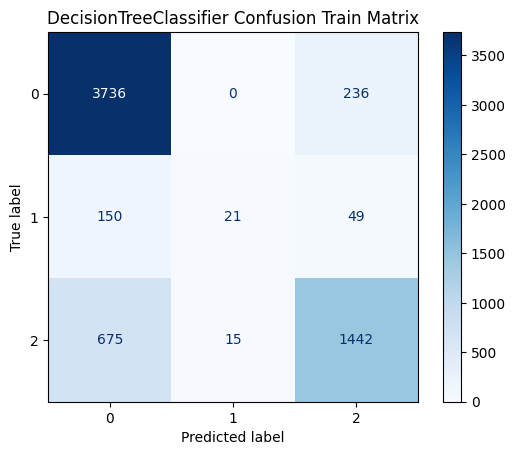

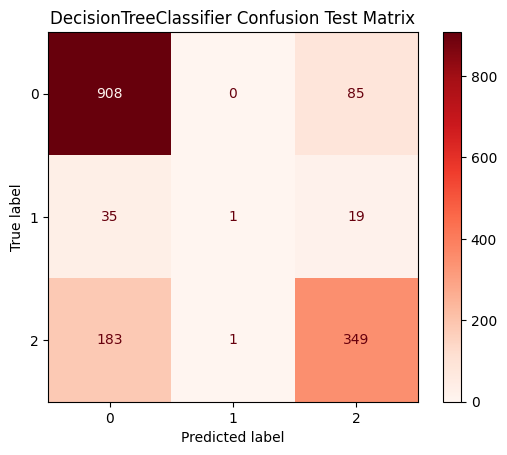

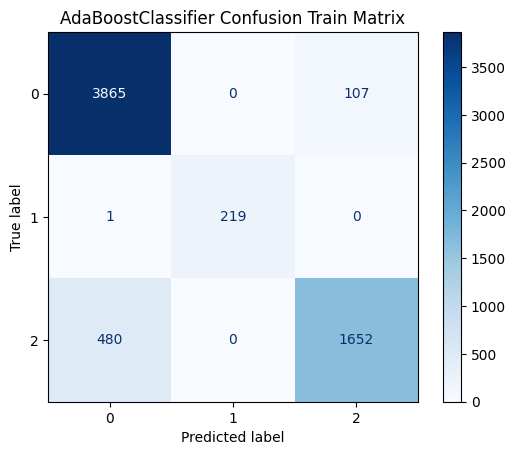

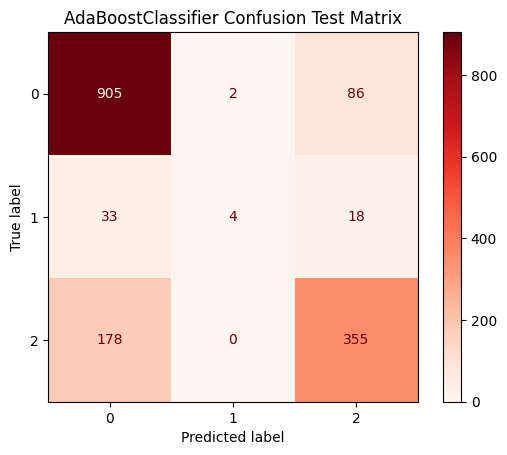

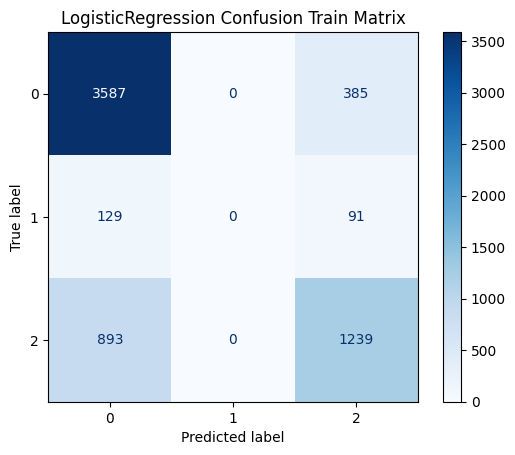

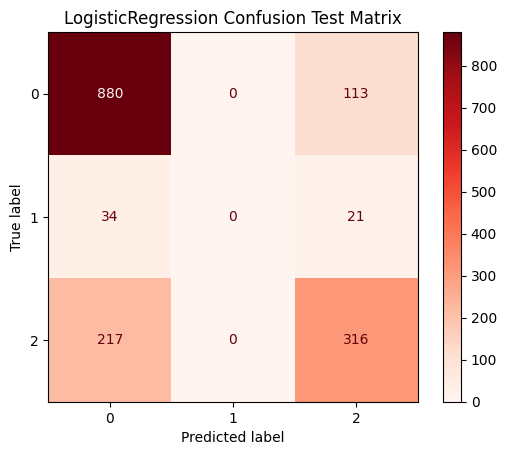

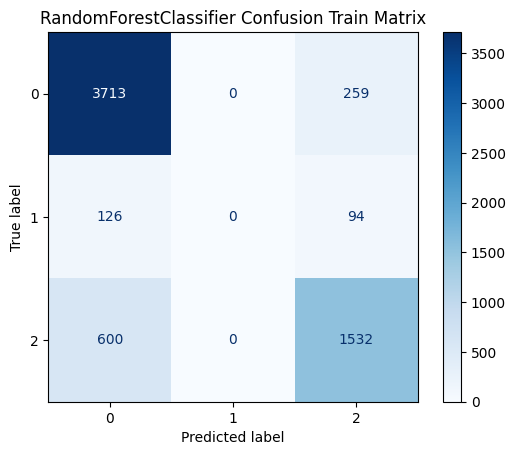

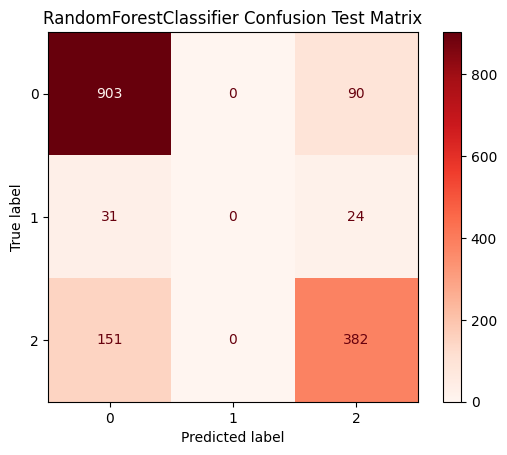

In [25]:
from Paquetes.metrics import  clasification_metrics

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
piplines_fitted = [pipe.fit(X_smoted, y_smoted) for pipe in pipelines]

metrics_list = clasification_metrics(
                                        y_train = y_smoted,
                                        x_train= X_smoted,
                                        y_test  = y_test,
                                        x_test = X_test,
                                        clasifier = piplines_fitted,
                                        average = 'macro',
                                        metrics = [
                                                        "Recall" ,
                                                        "Precision",
                                                        "F1Score",
                                                        "Especificidad" ,
                                                        "JaccardIndex" 
                                                    ],
                                        plot_roc_curve = True,
                                        plot_confusion_matrix = True,

                                        )


In [26]:
# macro
for metric in metrics_list:
    print(metric.head())

                          Recall Precision   F1Score JaccardIndex
DecisionTreeClassifier       NaN       NaN       NaN          NaN
Train                     0.5708  0.745809  0.595689     0.488263
Test                    0.529122  0.692271  0.533335      0.43851
                      Recall Precision   F1Score JaccardIndex
AdaBoostClassifier       NaN       NaN       NaN          NaN
Train               0.914458  0.942831   0.92539     0.867079
Test                0.550049   0.75034  0.568367     0.459712
                      Recall Precision   F1Score JaccardIndex
LogisticRegression       NaN       NaN       NaN          NaN
Train               0.494739  0.500236   0.49339      0.39778
Test                0.493025  0.493432  0.490518      0.39372
                          Recall Precision   F1Score JaccardIndex
RandomForestClassifier       NaN       NaN       NaN          NaN
Train                   0.551123  0.549727   0.54855     0.468945
Test                    0.542021   0.53414

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


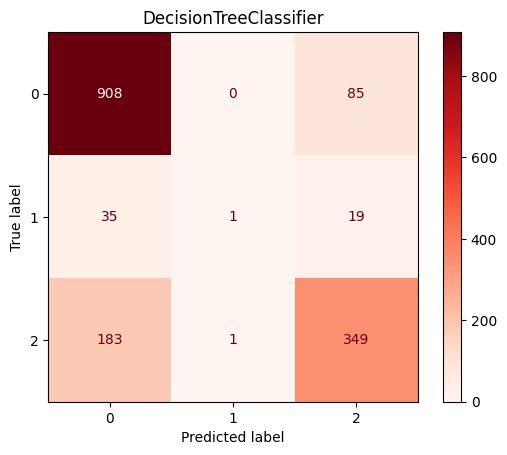

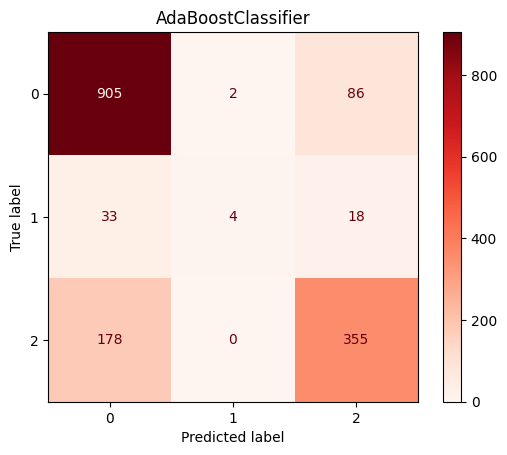

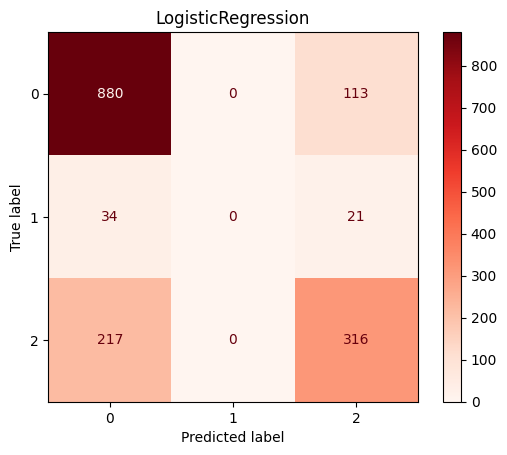

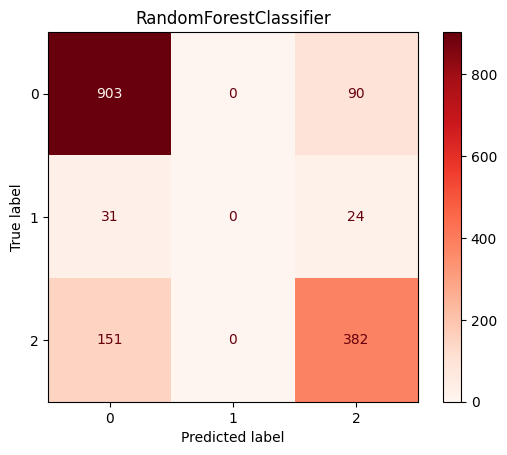

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
for pipe in pipelines:
    pipe.fit(X_smoted, y_smoted) 
    disp = ConfusionMatrixDisplay.from_estimator(
                                                estimator=pipe,
                                                X =X_test,
                                                y= y_test,
                                                labels = pipe.classes_,
                                                include_values = True,
                                                cmap = "Reds",
                                                )
    disp.ax_.set_title(f"{str(pipe.__class__).split('.')[-1][0:len(str(pipe.__class__).split('.')[-1])-2]}")

    
